<a href="https://colab.research.google.com/github/DaraSamii/machine-learning-packages-summary/blob/main/EvalML_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installin EvalML

In [ ]:
!pip install evalml[complete]

#Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import evalml

# demo Datasets

* **load_breast_cancer:** Load breast cancer dataset. Binary classification problem.

* **load_diabetes:** Load diabetes dataset. Used for regression problem.

* **load_fraud:** Load credit card fraud dataset.The fraud dataset can be used for binary classification problems.

* **load_weather:** Load the Australian daily-min-termperatures weather dataset.

* **load_wine:**:Load wine dataset. Multiclass problem.

In [ ]:
from evalml.demos import *

In [ ]:
X,y = load_fraud()
data = pd.DataFrame(X)
data['target'] = y
data

             Number of Features
Boolean                       1
Categorical                   6
Numeric                       5

Number of training examples: 99992
Targets
False    84.82%
True     15.18%
Name: fraud, dtype: object


,card_id,store_id,datetime,amount,currency,customer_present,expiration_date,provider,lat,lng,region,country,target
id,,,,,,,,,,,,,
0,32261,8516,2019-01-01 00:12:26,24900,CUC,True,08/24,Mastercard,38.58894,-89.99038,Fairview Heights,US,False
1,16434,8516,2019-01-01 09:42:03,15789,MYR,False,11/21,Discover,38.58894,-89.99038,Fairview Heights,US,False
2,23468,8516,2019-04-17 08:17:01,1883,AUD,False,09/27,Discover,38.58894,-89.99038,Fairview Heights,US,False
3,14364,8516,2019-01-30 11:54:30,82120,KRW,True,09/20,JCB 16 digit,38.58894,-89.99038,Fairview Heights,US,False
4,29407,8516,2019-05-01 17:59:36,25745,MUR,True,09/22,American Express,38.58894,-89.99038,Fairview Heights,US,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,3261,3261,2019-06-02 02:05:08,44801,KWD,False,01/21,VISA 16 digit,6.15038,6.83042,Nkpor,NG,False
99988,28976,3261,2019-08-05 09:35:22,64071,BTN,True,11/19,JCB 16 digit,6.15038,6.83042,Nkpor,NG,False
99989,20704,3261,2019-07-26 22:29:05,21081,JOD,False,02/23,Maestro,6.15038,6.83042,Nkpor,NG,False


#Preprocessing

In [ ]:
from evalml.preprocessing import *
from evalml.utils import infer_feature_types

In [ ]:
target_distribution(data['target'])

Targets
False    84.82%
True     15.18%
Name: target, dtype: object


## data typing with woodwork

In [ ]:
data.ww.init()

In [ ]:
data.ww['expiration_date'] = data['expiration_date'].apply(lambda x: '20{}-01-{}'.format(x.split("/")[1], x.split("/")[0]))

data = infer_feature_types(data, feature_types= {'store_id': 'categorical',
                                           'expiration_date': 'datetime',
                                           'lat': 'categorical',
                                           'lng': 'categorical',
                                           'provider': 'categorical'})
data.ww

,Physical Type,Logical Type,Semantic Tag(s)
Column,,,
card_id,int64,Integer,['numeric']
store_id,int64,Integer,['numeric']
datetime,datetime64[ns],Datetime,[]
amount,int64,Integer,['numeric']
currency,category,Categorical,['category']
customer_present,bool,Boolean,[]
expiration_date,category,Categorical,['category']
provider,category,Categorical,['category']
lat,float64,Double,['numeric']


## Problem Types
* BINARY
* MULTICLASS
* REGRESSION
* TIME_SERIES_BINARY
* TIME_SERIES_MULTICLASS
* TIME_SERIES_REGRESSION

## Spliting Data

In [ ]:
X_train, X_holdout, y_train, y_holdout = split_data(data.drop('target',axis=1), data['target'], problem_type='binary', test_size=.2,)

# AutoML

In [ ]:
from evalml import AutoMLSearch

## Models

**َallowed_model_families:**
* Arima
* Baseline
* CatBoost
* Decision_Tree
* Ensemble
* Exponential_smoothing
* Extra_Trees
* K_Neighbors
* LightGBM
* Linear_model
* Prothet
* Random_Forest
* SVM
* Vompal_Wabbit
* XGBoost


In [ ]:
evalml.pipelines.components.utils._all_estimators()

[evalml.pipelines.components.ensemble.stacked_ensemble_regressor.StackedEnsembleRegressor,
 evalml.pipelines.components.ensemble.stacked_ensemble_classifier.StackedEnsembleClassifier,
 evalml.pipelines.components.estimators.regressors.vowpal_wabbit_regressor.VowpalWabbitRegressor,
 evalml.pipelines.components.estimators.regressors.arima_regressor.ARIMARegressor,
 evalml.pipelines.components.estimators.regressors.exponential_smoothing_regressor.ExponentialSmoothingRegressor,
 evalml.pipelines.components.estimators.regressors.svm_regressor.SVMRegressor,
 evalml.pipelines.components.estimators.regressors.prophet_regressor.ProphetRegressor,
 evalml.pipelines.components.estimators.regressors.time_series_baseline_estimator.TimeSeriesBaselineEstimator,
 evalml.pipelines.components.estimators.regressors.decision_tree_regressor.DecisionTreeRegressor,
 evalml.pipelines.components.estimators.regressors.baseline_regressor.BaselineRegressor,
 evalml.pipelines.components.estimators.regressors.et_reg

In [ ]:
evalml.pipelines.components.utils.allowed_model_families('binary')

[ModelFamily.LIGHTGBM,
 ModelFamily.XGBOOST,
 ModelFamily.EXTRA_TREES,
 ModelFamily.CATBOOST,
 ModelFamily.DECISION_TREE,
 ModelFamily.LINEAR_MODEL,
 ModelFamily.RANDOM_FOREST]

In [ ]:
automl = AutoMLSearch(X_train=X_train,
                      y_train=y_train,
                      problem_type='binary',
                      objective='f1',
                      allowed_model_families = ['lightGBM','XGBoost','CatBoost'],
                      max_batches=1, verbose=True)

Generating pipelines to search over...


INFO:evalml.automl.automl_algorithm.iterative_algorithm.verbose:Generating pipelines to search over...
DEBUG:evalml.automl.automl_algorithm.iterative_algorithm.verbose:allowed_estimators set to ['LightGBM Classifier', 'CatBoost Classifier', 'XGBoost Classifier']
DEBUG:evalml.automl.automl_algorithm.iterative_algorithm.verbose:allowed_pipelines set to ['XGBoost Classifier w/ Label Encoder + DateTime Featurizer + Imputer + One Hot Encoder + Undersampler', 'LightGBM Classifier w/ Label Encoder + DateTime Featurizer + Imputer + One Hot Encoder + Undersampler', 'CatBoost Classifier w/ Label Encoder + DateTime Featurizer + Imputer + Undersampler']
DEBUG:evalml.automl.automl_algorithm.iterative_algorithm.verbose:allowed_model_families set to ['lightGBM', 'XGBoost', 'CatBoost']


3 pipelines ready for search.


INFO:evalml.automl.automl_algorithm.iterative_algorithm.verbose:3 pipelines ready for search.


In [ ]:
automl.search()


*****************************


INFO:evalml.automl.automl_search.verbose:
*****************************


* Beginning pipeline search *


INFO:evalml.automl.automl_search.verbose:* Beginning pipeline search *


*****************************


INFO:evalml.automl.automl_search.verbose:*****************************


INFO:evalml.automl.automl_search.verbose:


Optimizing for F1. 


INFO:evalml.automl.automl_search.verbose:Optimizing for F1. 


Greater score is better.



INFO:evalml.automl.automl_search.verbose:Greater score is better.



Using SequentialEngine to train and score pipelines.


INFO:evalml.automl.automl_search.verbose:Using SequentialEngine to train and score pipelines.


Searching up to 1 batches for a total of 4 pipelines. 


INFO:evalml.automl.automl_search.verbose:Searching up to 1 batches for a total of 4 pipelines. 


Allowed model families: xgboost, lightgbm, catboost



INFO:evalml.automl.automl_search.verbose:Allowed model families: xgboost, lightgbm, catboost



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline


INFO:evalml.automl.automl_search.verbose:Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline


Mode Baseline Binary Classification Pipeline:


INFO:evalml.automl.automl_search.verbose:Mode Baseline Binary Classification Pipeline:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.000)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 score: 0.000
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.000)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 score: 0.000
DEBUG:evalml.automl.automl_search.

	Finished cross validation - mean F1: 0.000


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1: 0.000



*****************************


INFO:evalml.automl.automl_search.verbose:
*****************************


* Evaluating Batch Number 1 *


INFO:evalml.automl.automl_search.verbose:* Evaluating Batch Number 1 *


*****************************


INFO:evalml.automl.automl_search.verbose:*****************************


INFO:evalml.automl.automl_search.verbose:


XGBoost Classifier w/ Label Encoder + DateTime Featurizer + Imputer + One Hot Encoder + Undersampler:


INFO:evalml.automl.automl_search.verbose:XGBoost Classifier w/ Label Encoder + DateTime Featurizer + Imputer + One Hot Encoder + Undersampler:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.714)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 score: 0.800
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.803)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 score: 0.801
DEBUG:evalml.automl.automl_search.

	Finished cross validation - mean F1: 0.800


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1: 0.800


LightGBM Classifier w/ Label Encoder + DateTime Featurizer + Imputer + One Hot Encoder + Undersampler:


INFO:evalml.automl.automl_search.verbose:LightGBM Classifier w/ Label Encoder + DateTime Featurizer + Imputer + One Hot Encoder + Undersampler:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.347)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 score: 0.800
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.432)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 score: 0.801
DEBUG:evalml.automl.automl_search.

	Finished cross validation - mean F1: 0.799


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1: 0.799


CatBoost Classifier w/ Label Encoder + DateTime Featurizer + Imputer + Undersampler:


INFO:evalml.automl.automl_search.verbose:CatBoost Classifier w/ Label Encoder + DateTime Featurizer + Imputer + Undersampler:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.535)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 score: 0.798
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.592)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 score: 0.799
DEBUG:evalml.automl.automl_search.

	Finished cross validation - mean F1: 0.798


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1: 0.798



Search finished after 00:52            


INFO:evalml.automl.automl_search.verbose:
Search finished after 00:52            


Best pipeline: XGBoost Classifier w/ Label Encoder + DateTime Featurizer + Imputer + One Hot Encoder + Undersampler


INFO:evalml.automl.automl_search.verbose:Best pipeline: XGBoost Classifier w/ Label Encoder + DateTime Featurizer + Imputer + One Hot Encoder + Undersampler


Best pipeline F1: 0.800019


INFO:evalml.automl.automl_search.verbose:Best pipeline F1: 0.800019


In [ ]:
automl.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,1,XGBoost Classifier w/ Label Encoder + DateTime...,1,0.800019,0.000921,0.800019,80.001919,False,"{'Label Encoder': {'positive_label': None}, 'D..."
1,2,LightGBM Classifier w/ Label Encoder + DateTim...,2,0.799109,0.001714,0.799109,79.910949,False,"{'Label Encoder': {'positive_label': None}, 'D..."
2,3,CatBoost Classifier w/ Label Encoder + DateTim...,3,0.798341,0.000876,0.798341,79.834124,False,"{'Label Encoder': {'positive_label': None}, 'D..."
3,0,Mode Baseline Binary Classification Pipeline,0,0.000000,0.000000,0.000000,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


## Choosing best pipeline

In [ ]:
pipeline = automl.get_pipeline(1)
pipeline.describe()

In [ ]:
best_pipeline = automl.best_pipeline

In [ ]:
best_pipeline.describe()

## Graphs

In [ ]:
best_pipeline.graph_feature_importance()

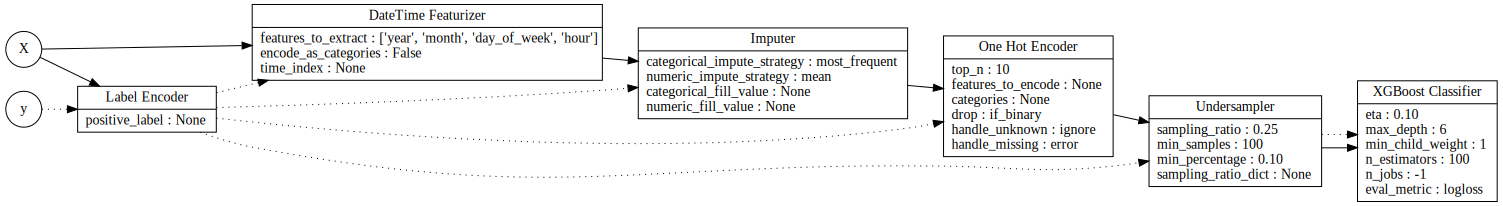

In [ ]:
best_pipeline.graph()

In [ ]:
male = [0.0.1]
felame = =[0.1.0]


## Model understaning

[guide](https://evalml.alteryx.com/en/stable/user_guide/model_understanding.html)

In [ ]:
from evalml.model_understanding.graphs import *

In [ ]:
y_pred = best_pipeline.predict(X_holdout)
y_pred_prob = best_pipeline.predict_proba(X_holdout)

In [ ]:
graph_confusion_matrix(y_true=y_holdout, y_pred=y_pred)

In [ ]:
graph_precision_recall_curve(y_true=y_holdout,y_pred_proba=y_pred_prob)

In [ ]:
graph_roc_curve(y_true=y_holdout,y_pred_proba=y_pred_prob)

#Objectives

In [ ]:
import evalml
obj = np.array(evalml.objectives.get_all_objective_names()).reshape(13,3)
pd.DataFrame(obj)

,0,1,2
0,expvariance,maxerror,medianae
1,mse,mae,r2
2,mean squared log error,root mean squared log error,root mean squared error
3,mean absolute percentage error,mcc multiclass,log loss multiclass
4,auc weighted,auc macro,auc micro
5,recall weighted,recall macro,recall micro
6,precision weighted,precision macro,precision micro
7,f1 weighted,f1 macro,f1 micro
8,balanced accuracy multiclass,accuracy multiclass,mcc binary
9,log loss binary,gini,auc


#prediction

In [ ]:
pipeline.score(X_holdout, y_holdout,["f1",'auc','precision','recall'])

OrderedDict([('F1', 0.8043264503441495),
             ('AUC', 0.8453791391431883),
             ('Precision', 0.9980478282088824),
             ('Recall', 0.6735836627140975)])